In [419]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-liver-patient-records/indian_liver_patient.csv


In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [421]:
data = pd.read_csv('/kaggle/input/indian-liver-patient-records/indian_liver_patient.csv')
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


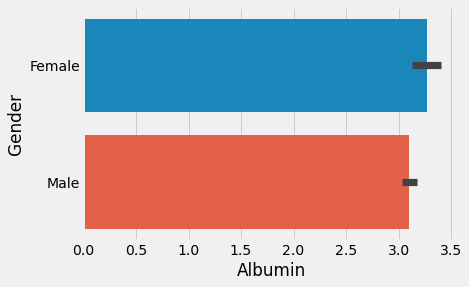

In [422]:
plt.style.use('fivethirtyeight')
sns.barplot(x='Albumin', y='Gender', data=data)

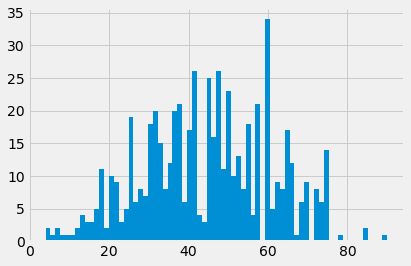

In [423]:
data['Age'].hist(bins=70)

In [424]:
data['Age'].quantile([0, 0.25, .75, .9])

0.00     4.0
0.25    33.0
0.75    58.0
0.90    66.0
Name: Age, dtype: float64

In [425]:
def age_categorize(age):
    """Categorize Age by three Category (Young, Adult, Senior) using Age Quantile"""
    if age < 20.125:
        return 'Young'
    elif 20.125 <= age <= 38.000:
        return 'Adult'
    else:
        return 'Senior'

data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Age_Category'] = data['Age'].apply(age_categorize)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
 11  Age_Category                583 non-null    object 
dtypes: float64(5), int64(5), object(2)
memory usage: 54.8+ KB


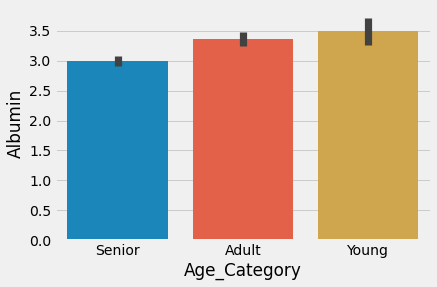

In [426]:
sns.barplot(x='Age_Category', y='Albumin', data=data)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


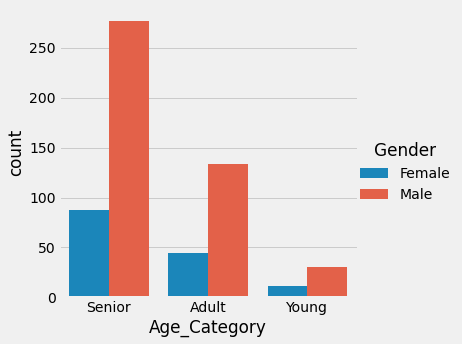

In [427]:
sns.factorplot(x='Age_Category', kind='count', hue='Gender', data=data)

In [428]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Age_Category
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,Senior
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,Senior
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,Senior
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,Senior
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,Senior


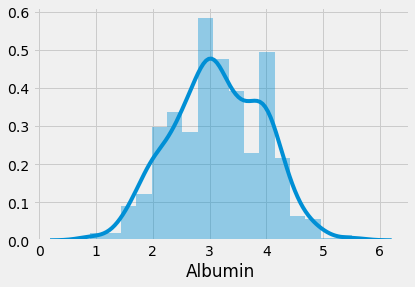

In [429]:
sns.distplot(data.Albumin)

In [430]:
data.Albumin.quantile([.25, .5, .75])

0.25    2.6
0.50    3.1
0.75    3.8
Name: Albumin, dtype: float64

In [431]:
def albumin_level(Albumin):
    if Albumin < 3.4:
        return 'Low'
    elif 3.4 <= Albumin <= 5.4:
        return 'Normal'
    else:
        return 'High'

data['Albumin_level'] = data.Albumin.apply(albumin_level)

def bilirubin_level(Direct_Bilirubin):
    if Direct_Bilirubin < 0.2:
        return 'Low'
    elif 0.2 <= Direct_Bilirubin <= 1.2:
        return 'Normal'
    else:
        return 'High'

data['Bilirubin_level'] = data.Direct_Bilirubin.apply(bilirubin_level)

def alkaline_phosphotase_level(Alkaline_Phosphotase):
    if Alkaline_Phosphotase < 20:
        return 'Low'
    elif 20 <= Alkaline_Phosphotase <= 140:
        return 'Normal'
    else:
        return 'High'

data['Alkaline_Phosphotase_level'] = data.Alkaline_Phosphotase.apply(alkaline_phosphotase_level)

def alamine_aminotransferase_level(Alamine_Aminotransferase):
    if Alamine_Aminotransferase < 10:
        return 'Low'
    elif 10 <= Alamine_Aminotransferase <= 40:
        return 'Normal'
    else:
        return 'High'

data['Alamine_Aminotransferase_level'] = data.Alamine_Aminotransferase.apply(alamine_aminotransferase_level)

def aspartate_aminotransferase_level(Aspartate_Aminotransferase):
    if Aspartate_Aminotransferase < 10:
        return 'Low'
    elif 10 <= Aspartate_Aminotransferase <= 40:
        return 'Normal'
    else:
        return 'High'

data['Aspartate_Aminotransferase_level'] = data.Aspartate_Aminotransferase.apply(aspartate_aminotransferase_level)

def fever(Albumin_level):
    count = 0
    if Albumin_level != 'Normal':
        return 'Yes'
    else :
        return 'No'
    
    
data['Patient_has_fever'] = data.Albumin_level.apply(fever)
        
    

data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Age_Category,Albumin_level,Bilirubin_level,Alkaline_Phosphotase_level,Alamine_Aminotransferase_level,Aspartate_Aminotransferase_level,Patient_has_fever
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,Senior,Low,Low,High,Normal,Normal,Yes
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,Senior,Low,High,High,High,High,Yes
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,Senior,Low,High,High,High,High,Yes
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,Senior,Normal,Normal,High,Normal,Normal,No
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,Senior,Low,High,High,Normal,High,Yes


In [ ]:
sns.barplot(x='Albumin_level', y='Age', data=data)

In [ ]:
sns.pointplot(x='Albumin_level', y='Total_Protiens', hue='Gender', data=data)

In [ ]:
data2 = pd.read_csv('/kaggle/input/indian-liver-patient-records/indian_liver_patient.csv')
data2['Albumin_level'] = data.Albumin.apply(albumin_level)
data2.head()

In [ ]:
def preproccesing_data(df):
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Age_Category'] = (df['Age'].apply(age_categorize)).map({'Young':0, 'Adult':1, 'Senior':2})
    df['Albumin_Level'] = (df['Albumin'].apply(albumin_level)).map({'Low':0, 'Normal':1, 'High':2})
    df['Bilirubin_Level'] = (df.Direct_Bilirubin.apply(bilirubin_level)).map({'Low':0, 'Normal':1, 'High':2})
    df['Alkaline_Phosphotase_Level'] = (df.Alkaline_Phosphotase.apply(alkaline_phosphotase_level)).map({'Low':0, 'Normal':1, 'High':2})
    df['Alamine_Aminotransferase_Level'] = (df.Alamine_Aminotransferase.apply(alamine_aminotransferase_level)).map({'Low':0, 'Normal':1, 'High':2})
    df['Aspartate_Aminotransferase_Level'] = (df.Aspartate_Aminotransferase.apply(aspartate_aminotransferase_level)).map({'Low':0, 'Normal':1, 'High':2})
    df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
    df['Has_fever'] =  (df.Albumin_level.apply(fever)).map({'No':0, 'Yes':1})
    df_final = df.drop(['Albumin','Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin_and_Globulin_Ratio', 'Dataset', 'Albumin_level'], axis=1)
    return df_final

data_final = preproccesing_data(data2)
data_final.head(50)

In [ ]:
X= data_final[['Age','Gender','Age_Category']]
y= data_final[['Albumin_Level']]
X_train, X_test, y_train, y_test =train_test_split (X,y,test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train,y_train) * 100, 2)
acc_svc

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)